# 9차시 : 고객정보 컬럼 고급 관리

---

## 1. map 함수를 이용한 컬럼 관리

### 1.1 엑셀파일 데이터 타입 변환

- map함수는 반복문(for구문 등) 없이 컬럼 관리 가능
- map함수에 딕셔너리를 적용하여 컬럼값 일괄 처리
- 데이터프레임.컬럼명.map({딕셔너리}) 형태로 사용

#### 고객정보 읽어오기

In [1]:
import pandas as pd

In [2]:
고객정보파일 = '../데이터/고객정보2.xlsx'

In [3]:
고객정보 = pd.read_excel(고객정보파일)

In [7]:
고객정보[:5]

,고객번호,성명,영문명,전화번호,메일주소,주소,생일,예금잔액,대출잔액,보유금액,그룹코드,등록일
0,C001,제우스,Zeus,010-1111-2222,zeus@abc.com,서울시 양천구 목동 12-3,1965-02-03,1000000,10000000,-9000000,3,2015-05-01
1,C002,헤라,Hera,010-2222-3333,hera@bcd.com,서울시 강남구 역삼동 13-4,1974-09-23,1500000,9000000,-7500000,3,2016-08-24
2,C003,데메테르,Demeter,010-3333-4444,demeter@def.cc.com,서울시 송파구 잠실동 15-5,1978-12-20,2000000,8000000,-6000000,3,2018-06-02
3,C004,디오니소스,Dionysos,010-4444-5555,dionysos@efg.com,서울시 성북구 성북동 22-1,1972-05-30,2500000,7000000,-4500000,3,2017-12-23
4,C005,아레스,Ares,010-5555-6666,ares@fgh.com,서울시 강동구 상일동 10-3,1988-03-09,3000000,6000000,-3000000,2,2015-09-07


#### 엑셀파일 읽을 때 데이터 타입 변환
- read_excel함수의 converters 파라미터에 값 설정
- converters 파라미터의 값 설정은 딕셔너리로 사용
- pd.read_excel(데이터프레임명, converters={'컬럼명':데이터타입, '컬럼명':데이터타입})
- 데이터 타입 변환은 대부분 문자열이며, 문자열인 경우 str로 지정

In [8]:
고객정보 = pd.read_excel(고객정보파일, converters={'그룹코드':str})

In [9]:
고객정보[:5]

,고객번호,성명,영문명,전화번호,메일주소,주소,생일,예금잔액,대출잔액,보유금액,그룹코드,등록일
0,C001,제우스,Zeus,010-1111-2222,zeus@abc.com,서울시 양천구 목동 12-3,1965-02-03,1000000,10000000,-9000000,03,2015-05-01
1,C002,헤라,Hera,010-2222-3333,hera@bcd.com,서울시 강남구 역삼동 13-4,1974-09-23,1500000,9000000,-7500000,03,2016-08-24
2,C003,데메테르,Demeter,010-3333-4444,demeter@def.cc.com,서울시 송파구 잠실동 15-5,1978-12-20,2000000,8000000,-6000000,03,2018-06-02
3,C004,디오니소스,Dionysos,010-4444-5555,dionysos@efg.com,서울시 성북구 성북동 22-1,1972-05-30,2500000,7000000,-4500000,03,2017-12-23
4,C005,아레스,Ares,010-5555-6666,ares@fgh.com,서울시 강동구 상일동 10-3,1988-03-09,3000000,6000000,-3000000,02,2015-09-07


#### read_excel함수의 추가적인 옵션 파라미터

- skiprows : skip하고 읽을 행의 갯수
- header : 컬럼명 지정 여부
- parse_cols : 읽을 컬럼의 범위 지정 ('A:M')

---

### 1.2 map 함수와 딕셔너리를 이용한 신규 컬럼 추가

- map함수는 반복문(for구문 등) 없이 컬럼 관리 가능
- map함수에 딕셔너리를 적용하여 컬럼값 일괄 처리
- 데이터프레임.컬럼명.map({딕셔너리}) 형태로 사용

#### map함수 적용을 위한 딕셔너리 정의
- 그룹코드에 따라 고객그룹 컬럼을 신규로 추가
- 그룹코드 '01'은 고객그룹에 'A그룹', 그룹코드 '02'는 'B그룹', 그룹코드 '03'은 'C그룹'
- 딕셔너리 데이터 타입으로 이를 정의하면 {'01': 'A그룹', '02':'B그룹', '03':'C그룹'}

In [10]:
딕셔너리 = {'01': 'A그룹', '02':'B그룹', '03':'C그룹'}

#### map 함수에 딕셔너리 적용

In [12]:
고객정보['그룹명'] = 고객정보.그룹코드.map(딕셔너리)

In [13]:
고객정보

,고객번호,성명,영문명,전화번호,메일주소,주소,생일,예금잔액,대출잔액,보유금액,그룹코드,등록일,그룹명
0,C001,제우스,Zeus,010-1111-2222,zeus@abc.com,서울시 양천구 목동 12-3,1965-02-03,1000000,10000000,-9000000,03,2015-05-01,C그룹
1,C002,헤라,Hera,010-2222-3333,hera@bcd.com,서울시 강남구 역삼동 13-4,1974-09-23,1500000,9000000,-7500000,03,2016-08-24,C그룹
2,C003,데메테르,Demeter,010-3333-4444,demeter@def.cc.com,서울시 송파구 잠실동 15-5,1978-12-20,2000000,8000000,-6000000,03,2018-06-02,C그룹
3,C004,디오니소스,Dionysos,010-4444-5555,dionysos@efg.com,서울시 성북구 성북동 22-1,1972-05-30,2500000,7000000,-4500000,03,2017-12-23,C그룹
4,C005,아레스,Ares,010-5555-6666,ares@fgh.com,서울시 강동구 상일동 10-3,1988-03-09,3000000,6000000,-3000000,02,2015-09-07,B그룹
5,C006,아르테미스,Artemis,010-6666-7777,artemis@ghi.com,서울시 강서구 방화동 29-7,1970-12-01,3500000,5000000,-1500000,02,2016-01-06,B그룹
6,C007,아테나,Athena,010-7777-8888,athena@hij.com,인천시 남구 도화동 36-9,1990-07-12,4000000,4000000,0,02,2018-05-08,B그룹
7,C008,아폴론,Apollon,010-8888-9999,apollon@ijk.com,대전시 중구 은행동 34-5,1982-06-12,4500000,3000000,1500000,02,2018-02-24,B그룹
8,C009,아프로디테,Aphrodite,010-9999-1010,aphrodite@jkl.com,부산시 부산진구 양정동 59-7,1991-04-07,5000000,2000000,3000000,02,2017-11-21,B그룹
9,C010,포세이돈,Poseidon,010-1010-2020,poseidon@klm.com,대구시 수성구 범어동 78-2,1987-01-18,5500000,1000000,4500000,01,2016-03-11,A그룹


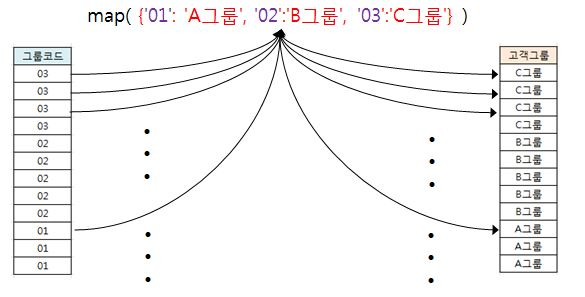

In [16]:
from IPython.display import Image
Image('map.JPG')

#### map 함수와 딕셔너리를 이용한 신규 컬럼 추가

In [17]:
고객정보['고객그룹'] = 고객정보.그룹코드.map(딕셔너리)

In [18]:
고객정보

,고객번호,성명,영문명,전화번호,메일주소,주소,생일,예금잔액,대출잔액,보유금액,그룹코드,등록일,그룹명,고객그룹
0,C001,제우스,Zeus,010-1111-2222,zeus@abc.com,서울시 양천구 목동 12-3,1965-02-03,1000000,10000000,-9000000,03,2015-05-01,C그룹,C그룹
1,C002,헤라,Hera,010-2222-3333,hera@bcd.com,서울시 강남구 역삼동 13-4,1974-09-23,1500000,9000000,-7500000,03,2016-08-24,C그룹,C그룹
2,C003,데메테르,Demeter,010-3333-4444,demeter@def.cc.com,서울시 송파구 잠실동 15-5,1978-12-20,2000000,8000000,-6000000,03,2018-06-02,C그룹,C그룹
3,C004,디오니소스,Dionysos,010-4444-5555,dionysos@efg.com,서울시 성북구 성북동 22-1,1972-05-30,2500000,7000000,-4500000,03,2017-12-23,C그룹,C그룹
4,C005,아레스,Ares,010-5555-6666,ares@fgh.com,서울시 강동구 상일동 10-3,1988-03-09,3000000,6000000,-3000000,02,2015-09-07,B그룹,B그룹
5,C006,아르테미스,Artemis,010-6666-7777,artemis@ghi.com,서울시 강서구 방화동 29-7,1970-12-01,3500000,5000000,-1500000,02,2016-01-06,B그룹,B그룹
6,C007,아테나,Athena,010-7777-8888,athena@hij.com,인천시 남구 도화동 36-9,1990-07-12,4000000,4000000,0,02,2018-05-08,B그룹,B그룹
7,C008,아폴론,Apollon,010-8888-9999,apollon@ijk.com,대전시 중구 은행동 34-5,1982-06-12,4500000,3000000,1500000,02,2018-02-24,B그룹,B그룹
8,C009,아프로디테,Aphrodite,010-9999-1010,aphrodite@jkl.com,부산시 부산진구 양정동 59-7,1991-04-07,5000000,2000000,3000000,02,2017-11-21,B그룹,B그룹
9,C010,포세이돈,Poseidon,010-1010-2020,poseidon@klm.com,대구시 수성구 범어동 78-2,1987-01-18,5500000,1000000,4500000,01,2016-03-11,A그룹,A그룹


---

### 1.3 컬럼의 데이터 분포
 - 고객정보의 데이터프레임의 고객그룹과 같이 범주형 데이터의 분포 확인
 - value_counts() 함수 이용
 - 데이터프레임명.컬럼명.value_counts() 형태로 사용

In [20]:
고객그룹분포 = 고객정보.고객그룹.value_counts()

In [21]:
고객그룹분포

B그룹    5
C그룹    4
A그룹    3
Name: 고객그룹, dtype: int64

---

## 2. map함수와 사용자정의 함수를 이용한 컬럼 관리

### 2.1 개인정보 마스킹 처리

#### 개인정보 마스킹 처리를 위한 함수 정의
 - 고객정보인 전화번호 뒷자리 '\*'로 마스킹 처리 

In [22]:
def 마스크처리(문자열):    
    새문자열 = 문자열.replace(문자열[9:], '****')
    return 새문자열

#### 함수 테스트

In [23]:
마스크처리('010-1234-5678')

'010-1234-****'

#### map 함수 적용

In [24]:
고객정보.전화번호.map(마스크처리)

0     010-1111-****
1     010-2222-****
2     010-3333-****
3     010-4444-****
4     010-5555-****
5     010-6666-****
6     010-7777-****
7     010-8888-****
8     010-9999-****
9     010-1010-****
10    010-2020-****
11    010-3030-****
Name: 전화번호, dtype: object

#### 데이터프레임에 반영

In [25]:
고객정보['전화번호2'] = 고객정보.전화번호.map(마스크처리)
고객정보[:3]

,고객번호,성명,영문명,전화번호,메일주소,주소,생일,예금잔액,대출잔액,보유금액,그룹코드,등록일,그룹명,고객그룹,전화번호2
0,C001,제우스,Zeus,010-1111-2222,zeus@abc.com,서울시 양천구 목동 12-3,1965-02-03,1000000,10000000,-9000000,03,2015-05-01,C그룹,C그룹,010-1111-****
1,C002,헤라,Hera,010-2222-3333,hera@bcd.com,서울시 강남구 역삼동 13-4,1974-09-23,1500000,9000000,-7500000,03,2016-08-24,C그룹,C그룹,010-2222-****
2,C003,데메테르,Demeter,010-3333-4444,demeter@def.cc.com,서울시 송파구 잠실동 15-5,1978-12-20,2000000,8000000,-6000000,03,2018-06-02,C그룹,C그룹,010-3333-****


---

### 2.2 split함수를 이용한 주소 분할

#### 문자열 분할을 위한 split() 함수
- 특정 문자열을 기준으로 문자열을 분리하여 리스트로 변환
- 문자열.spilt() 형태로 사용
- split()함수의 파라미터는 분할의 기준이 되는 문자열
- 파라미터를 주지 않으면 공백 문자를 기준으로 분리

In [26]:
문자열 = '서울시 강동구 상일동'
분리문자열 = 문자열.split()
분리문자열

['서울시', '강동구', '상일동']

In [27]:
분리문자열[0]

'서울시'

In [28]:
메일주소 = 'zeus@abc.com'
분할메일주소 = 메일주소.split('@')
분할메일주소

['zeus', 'abc.com']

In [29]:
분할메일주소[1]

'abc.com'

#### 사용자 정의 함수 정의
- 주소를 분할하여 거주도시 컬럼 추가

In [30]:
def 거주도시(주소):
    도시 = 주소.split()[0]
    return 도시

In [31]:
거주도시('서울시 강동구 상일동')

'서울시'

#### map 함수를 이용한 주소분할 및 신규 컬럼 추가

In [32]:
고객정보.주소.map(거주도시)

0     서울시
1     서울시
2     서울시
3     서울시
4     서울시
5     서울시
6     인천시
7     대전시
8     부산시
9     대구시
10    광주시
11    제주시
Name: 주소, dtype: object

In [33]:
고객정보['거주도시'] = 고객정보.주소.map(거주도시)

In [35]:
고객정보

,고객번호,성명,영문명,전화번호,메일주소,주소,생일,예금잔액,대출잔액,보유금액,그룹코드,등록일,그룹명,고객그룹,전화번호2,거주도시
0,C001,제우스,Zeus,010-1111-2222,zeus@abc.com,서울시 양천구 목동 12-3,1965-02-03,1000000,10000000,-9000000,03,2015-05-01,C그룹,C그룹,010-1111-****,서울시
1,C002,헤라,Hera,010-2222-3333,hera@bcd.com,서울시 강남구 역삼동 13-4,1974-09-23,1500000,9000000,-7500000,03,2016-08-24,C그룹,C그룹,010-2222-****,서울시
2,C003,데메테르,Demeter,010-3333-4444,demeter@def.cc.com,서울시 송파구 잠실동 15-5,1978-12-20,2000000,8000000,-6000000,03,2018-06-02,C그룹,C그룹,010-3333-****,서울시
3,C004,디오니소스,Dionysos,010-4444-5555,dionysos@efg.com,서울시 성북구 성북동 22-1,1972-05-30,2500000,7000000,-4500000,03,2017-12-23,C그룹,C그룹,010-4444-****,서울시
4,C005,아레스,Ares,010-5555-6666,ares@fgh.com,서울시 강동구 상일동 10-3,1988-03-09,3000000,6000000,-3000000,02,2015-09-07,B그룹,B그룹,010-5555-****,서울시
5,C006,아르테미스,Artemis,010-6666-7777,artemis@ghi.com,서울시 강서구 방화동 29-7,1970-12-01,3500000,5000000,-1500000,02,2016-01-06,B그룹,B그룹,010-6666-****,서울시
6,C007,아테나,Athena,010-7777-8888,athena@hij.com,인천시 남구 도화동 36-9,1990-07-12,4000000,4000000,0,02,2018-05-08,B그룹,B그룹,010-7777-****,인천시
7,C008,아폴론,Apollon,010-8888-9999,apollon@ijk.com,대전시 중구 은행동 34-5,1982-06-12,4500000,3000000,1500000,02,2018-02-24,B그룹,B그룹,010-8888-****,대전시
8,C009,아프로디테,Aphrodite,010-9999-1010,aphrodite@jkl.com,부산시 부산진구 양정동 59-7,1991-04-07,5000000,2000000,3000000,02,2017-11-21,B그룹,B그룹,010-9999-****,부산시
9,C010,포세이돈,Poseidon,010-1010-2020,poseidon@klm.com,대구시 수성구 범어동 78-2,1987-01-18,5500000,1000000,4500000,01,2016-03-11,A그룹,A그룹,010-1010-****,대구시


#### 거주 도시별 고객 분포

In [36]:
고객정보.거주도시.value_counts()

서울시    6
대구시    1
인천시    1
제주시    1
광주시    1
부산시    1
대전시    1
Name: 거주도시, dtype: int64

---

### 2.3 lambda 함수

#### lambda 함수의 개요

- 함수의 일종으로 함수명 없이 사용하는 간단한 함수
- lambda 파라미터: 함수식 의 형태로 사용
- 별도의 return 구문이 없이 사용

In [37]:
람다함수 = lambda x: x * 10
print(람다함수(4))

40


In [38]:
def 람다함수(x):
    y = x *10
    return y

In [39]:
람다함수2 = lambda x, y: x * y
print(람다함수2(5, 8))

40


#### lambda함수를 이용한 메일주소 분할

In [40]:
고객정보.메일주소.map(lambda x: x.split('@')[1])

0        abc.com
1        bcd.com
2     def.cc.com
3        efg.com
4        fgh.com
5        ghi.com
6        hij.com
7        ijk.com
8        jkl.com
9        klm.com
10       lmn.com
11       mno.com
Name: 메일주소, dtype: object

In [41]:
고객정보['메일도메인'] = 고객정보.메일주소.map(lambda x: x.split('@')[1])

In [ ]:
고객정보[:5]